In [5]:
#001 フォルダー作成
import os
import pandas as pd

#docker のときは/workdir/ を追記する
# data_dir="Num_3_predict"
data_dir="/workdir/Num_3_predict"
input_dir=os.path.join(data_dir,"00_input")
output_dir=os.path.join(data_dir,"01_output")
output_results_dir=os.path.join(data_dir,"02_output_results")
master_dir=os.path.join(data_dir,"03_master")
display(input_dir)


'/workdir/Num_3_predict\\00_input'

In [6]:
#002　フォルダー出力
os.makedirs(input_dir,exist_ok=True)
os.makedirs(output_dir,exist_ok=True)
os.makedirs(output_results_dir,exist_ok=True)
os.makedirs(master_dir,exist_ok=True)

In [7]:
#003　csv_取得
import glob
Num_3_file=os.path.join(input_dir,'Num_3_*.csv')
Num_3_paths=glob.glob(Num_3_file)
display(Num_3_paths)

[]

In [8]:
#004 csv_data 呼び出し
Num_3_predict_dir=os.path.join(data_dir,'00_input//001_all_data')
Num_3_file='Num_3_2023.csv' #西暦ごと
Num_3=pd.read_csv(os.path.join(Num_3_predict_dir,Num_3_file))
display(Num_3.head())

#Num_3_file=pd.read_csv(os.path.join('Num_3_*.csv'))
#Num_3_file.head()

FileNotFoundError: [Errno 2] No such file or directory: '/workdir/Num_3_predict\\00_input//001_all_data\\Num_3_2023.csv'

In [ ]:
#005 欠損値の確認---どちらでもOK---
#Num_3.isna().sum 
Num_3.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         No   date  day of week  Lottery_result  hundreds_place  tens_place  \
0    False  False        False           False           False       False   
1    False  False        False           False           False       False   
2    False  False        False           False           False       False   
3    False  False        False           False           False       False   
4    False  False        False           False           False       False   
..     ...    ...          ...             ...             ...         ...   
252  False   True        False            True            True        True   
253  False   True        False            True            True        True   
254  False   True        False            True            True        True   
255  False   True        False            True            True        True   
256  False   True        False            True            True        True   

 

In [ ]:
#006 欠損値を除外
Num_3=Num_3.loc[Num_3['date']!= 999]

In [ ]:
#007 2010_2022 csv結合前にファイル確認
import pandas as pd
Num_3_predict_dir=os.path.join(data_dir,'00_input//001_all_data')
Num_3_file='Num_3_2010.csv' #西暦ごと
Num_3=pd.read_csv(os.path.join(Num_3_predict_dir,Num_3_file))
display(Num_3.head())

#Num_3_data=pd.read_csv('00_input\\Num_3_2010.csv')
#display(Num_3_data.head())

,No,date,day of week,Lottery_result,hundreds_place,tens_place,ones_place
0,1,2010/1/4,Monday,232,2,3,2
1,2,2010/1/5,Tuesday,619,6,1,9
2,3,2010/1/6,Wednesday,112,1,1,2
3,4,2010/1/7,Thursday,845,8,4,5
4,5,2010/1/8,Friday,523,5,2,3


In [ ]:
#007 2010_2022 csv結合前にファイル確認したほうがよい
import pandas as pd
Num_3_all=pd.DataFrame()
file=Num_3_paths[0]
Num_3_data=pd.read_csv(file)

display(f'{file}:{len(Num_3_data)}')
Num_3_all=pd.concat([Num_3_all,Num_3_data],ignore_index=True)
Num_3_all


'Num_3_predict\\00_input\\Num_3_2018.csv:257'

,No,date,Lottery_result,hundreds_place,tens_place,ones_place
0,1,2018/1/4,858,8,5,8
1,2,2018/1/5,384,3,8,4
2,3,2018/1/8,976,9,7,6
3,4,2018/1/9,930,9,3,0
4,5,2018/1/10,634,6,3,4
...,...,...,...,...,...,...
252,253,2018/12/24,329,3,2,9
253,254,2018/12/25,442,4,4,2
254,255,2018/12/26,644,6,4,4
255,256,2018/12/27,80,0,8,0


In [ ]:
#008 indexを1から振り直す
import numpy as np
Num_3_all.index=np.arange(1,len(Num_3_all)+1)

In [ ]:
#009 indexを確認
Num_3_all

,No,date,Lottery_result,hundreds_place,tens_place,ones_place
1,1,2018/1/4,858,8,5,8
2,2,2018/1/5,384,3,8,4
3,3,2018/1/8,976,9,7,6
4,4,2018/1/9,930,9,3,0
5,5,2018/1/10,634,6,3,4
...,...,...,...,...,...,...
253,253,2018/12/24,329,3,2,9
254,254,2018/12/25,442,4,4,2
255,255,2018/12/26,644,6,4,4
256,256,2018/12/27,80,0,8,0


In [ ]:
#010 2010_2022 csv結合
import pandas as pd
Num_3_all=pd.DataFrame()
for file in Num_3_paths:
    Num_3_data=pd.read_csv(file)
    display(f'{file}:{len(Num_3_data)}')
    Num_3_all=pd.concat([Num_3_all,Num_3_data],ignore_index=True)

'Num_3_predict\\00_input\\Num_3_2018.csv:257'

'Num_3_predict\\00_input\\Num_3_2019.csv:257'

'Num_3_predict\\00_input\\Num_3_2020.csv:258'

'Num_3_predict\\00_input\\Num_3_2021.csv:259'

'Num_3_predict\\00_input\\Num_3_2022.csv:259'

'Num_3_predict\\00_input\\Num_3_2023.csv:258'

'Num_3_predict\\00_input\\Num_3_2024.csv:74'

In [ ]:
#011 ファイル確認
Num_3_all

,No,date,Lottery_result,hundreds_place,tens_place,ones_place
0,1,2018/1/4,858,8,5,8
1,2,2018/1/5,384,3,8,4
2,3,2018/1/8,976,9,7,6
3,4,2018/1/9,930,9,3,0
4,5,2018/1/10,634,6,3,4
...,...,...,...,...,...,...
1617,70,2024/4/9,18,0,1,8
1618,71,2024/4/10,668,6,6,8
1619,72,2024/4/11,627,6,2,7
1620,73,2024/4/12,490,4,9,0


In [ ]:
#012 ファイルの欠損値確認
Num_3_all.isnull().sum()

No                0
date              0
Lottery_result    0
hundreds_place    0
tens_place        0
ones_place        0
dtype: int64

In [ ]:
#013 作成したNum_3_all ファイルを出力
data_file='Num_3_all.csv'
Num_3_all.to_csv(os.path.join(output_dir,data_file),index=False)


In [ ]:
#014  csvデータを確認
Num_3_all

,No,date,Lottery_result,hundreds_place,tens_place,ones_place
0,1,2018/1/4,858,8,5,8
1,2,2018/1/5,384,3,8,4
2,3,2018/1/8,976,9,7,6
3,4,2018/1/9,930,9,3,0
4,5,2018/1/10,634,6,3,4
...,...,...,...,...,...,...
1617,70,2024/4/9,18,0,1,8
1618,71,2024/4/10,668,6,6,8
1619,72,2024/4/11,627,6,2,7
1620,73,2024/4/12,490,4,9,0


In [ ]:
#015 indexを回別1～振り直し
Num_3_all['kaibetu']=range(1,len(Num_3_all.index)+1)

In [ ]:
#016 csvデータを確認
Num_3_all

,No,date,Lottery_result,hundreds_place,tens_place,ones_place,kaibetu
0,1,2018/1/4,858,8,5,8,1
1,2,2018/1/5,384,3,8,4,2
2,3,2018/1/8,976,9,7,6,3
3,4,2018/1/9,930,9,3,0,4
4,5,2018/1/10,634,6,3,4,5
...,...,...,...,...,...,...,...
1617,70,2024/4/9,18,0,1,8,1618
1618,71,2024/4/10,668,6,6,8,1619
1619,72,2024/4/11,627,6,2,7,1620
1620,73,2024/4/12,490,4,9,0,1621


In [ ]:
#020 object を datetime に変換
Num_3_all['date']=pd.to_datetime(Num_3_all['date'])

In [ ]:
#016 day of week をダミー変数化 challenge_２で変数へ変換へ変更
"""
import pandas as pd
import os
import glob

Num_3_all.loc[Num_3_all['day of week']=='Monday','week_flag']='1'
Num_3_all.loc[Num_3_all['day of week']=='Tuesday','week_flag']='2'
Num_3_all.loc[Num_3_all['day of week']=='Wednesday','week_flag']='3'
Num_3_all.loc[Num_3_all['day of week']=='Thursday','week_flag']='4'
Num_3_all.loc[Num_3_all['day of week']=='Friday','week_flag']='5'
Num_3_all.loc[Num_3_all['day of week']=='Saturday','week_flag']='6'
Num_3_all.loc[Num_3_all['day of week']=='Sunday','week_flag']='7'

data_file='Num_3_all.csv'
Num_3_all.to_csv(os.path.join(output_dir,data_file),index=False)
"""

"\nimport pandas as pd\nimport os\nimport glob\n\nNum_3_all.loc[Num_3_all['day of week']=='Monday','week_flag']='1'\nNum_3_all.loc[Num_3_all['day of week']=='Tuesday','week_flag']='2'\nNum_3_all.loc[Num_3_all['day of week']=='Wednesday','week_flag']='3'\nNum_3_all.loc[Num_3_all['day of week']=='Thursday','week_flag']='4'\nNum_3_all.loc[Num_3_all['day of week']=='Friday','week_flag']='5'\nNum_3_all.loc[Num_3_all['day of week']=='Saturday','week_flag']='6'\nNum_3_all.loc[Num_3_all['day of week']=='Sunday','week_flag']='7'\n\ndata_file='Num_3_all.csv'\nNum_3_all.to_csv(os.path.join(output_dir,data_file),index=False)\n"

In [ ]:
#016 曜日と曜日の変数を取得
Num_3_all['day_of_week']=Num_3_all['date'].dt.day_of_week
Num_3_all['day_name']=Num_3_all['date'].dt.day_name()

In [ ]:
#017 csvデータを確認
Num_3_all

,No,date,Lottery_result,hundreds_place,tens_place,ones_place,kaibetu,day_of_week,day_name
0,1,2018-01-04,858,8,5,8,1,3,Thursday
1,2,2018-01-05,384,3,8,4,2,4,Friday
2,3,2018-01-08,976,9,7,6,3,0,Monday
3,4,2018-01-09,930,9,3,0,4,1,Tuesday
4,5,2018-01-10,634,6,3,4,5,2,Wednesday
...,...,...,...,...,...,...,...,...,...
1617,70,2024-04-09,18,0,1,8,1618,1,Tuesday
1618,71,2024-04-10,668,6,6,8,1619,2,Wednesday
1619,72,2024-04-11,627,6,2,7,1620,3,Thursday
1620,73,2024-04-12,490,4,9,0,1621,4,Friday


In [ ]:
#018 ファイルの欠損値確認
Num_3_all.isnull().sum()

No                0
date              0
Lottery_result    0
hundreds_place    0
tens_place        0
ones_place        0
kaibetu           0
day_of_week       0
day_name          0
dtype: int64

In [ ]:
#019 data type 確認
Num_3_all.dtypes

No                         int64
date              datetime64[ns]
Lottery_result             int64
hundreds_place             int64
tens_place                 int64
ones_place                 int64
kaibetu                    int64
day_of_week                int64
day_name                  object
dtype: object

In [ ]:
#020 object を datetime に変換
#Num_3_all['date']=pd.to_datetime(Num_3_all['date'])

In [ ]:
#021 int64をobjectに変換 0埋めの効果なかったので保留
#Num_3_all['Lottery_result']=pd.Series(Num_3_all['Lottery_result'],dtype=str)

In [ ]:
#確認
Num_3_all

,No,date,Lottery_result,hundreds_place,tens_place,ones_place,kaibetu,day_of_week,day_name
0,1,2018-01-04,858,8,5,8,1,3,Thursday
1,2,2018-01-05,384,3,8,4,2,4,Friday
2,3,2018-01-08,976,9,7,6,3,0,Monday
3,4,2018-01-09,930,9,3,0,4,1,Tuesday
4,5,2018-01-10,634,6,3,4,5,2,Wednesday
...,...,...,...,...,...,...,...,...,...
1617,70,2024-04-09,18,0,1,8,1618,1,Tuesday
1618,71,2024-04-10,668,6,6,8,1619,2,Wednesday
1619,72,2024-04-11,627,6,2,7,1620,3,Thursday
1620,73,2024-04-12,490,4,9,0,1621,4,Friday


In [ ]:
#csv出力
data_file='Num_3_all.csv'
Num_3_all.to_csv(os.path.join(output_dir,data_file),index=False)

In [ ]:
#022 data type 確認
Num_3_all.dtypes

No                         int64
date              datetime64[ns]
Lottery_result             int64
hundreds_place             int64
tens_place                 int64
ones_place                 int64
kaibetu                    int64
day_of_week                int64
day_name                  object
dtype: object

In [ ]:
# 0埋め intなのでそのまま
#num=Num_3_all['Lottery_result']
#Num_3_all['Lottery_result']='{:0>3}'.format(num)
#Num_3_all['h_place']=num(fmt='%3d')

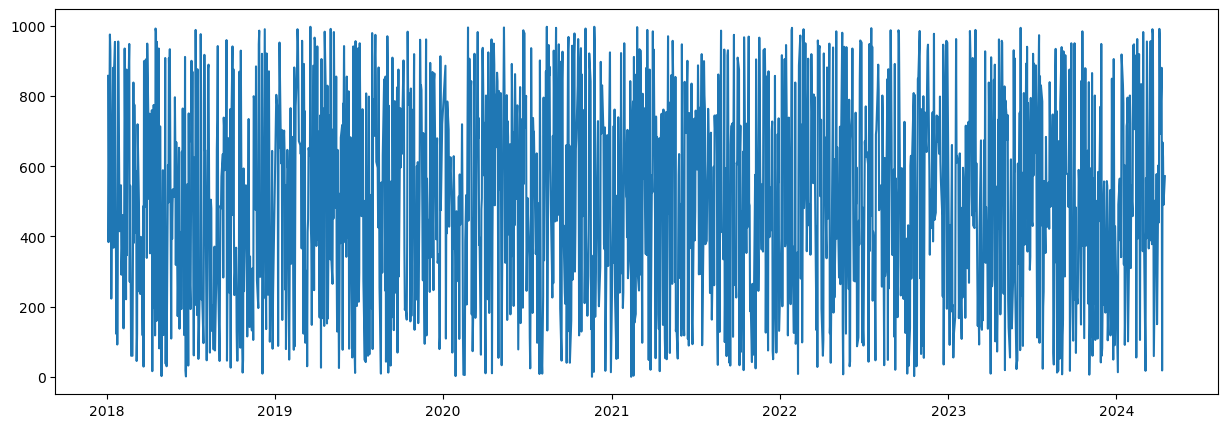

In [ ]:
#023 折れ線グラフ
import pandas as pd
import matplotlib.pyplot as plt
x=Num_3_all['date']
y=Num_3_all['Lottery_result']
plt.figure(figsize=(15,5))
plt.plot(x,y)


In [ ]:
#024 変数「date」をインデックスに設定
#Num_3_all='Num_3_predict/01_output/Num_3_All.csv'
#Num_3_data=pd.read_csv(Num_3_all,index_col='date')
#Num_3_data=pd.read_csv(Num_3_all,index_col='date',parse_dates=True)s

#Num_3_data.head()

In [ ]:
#022 data type 確認
Num_3_data.dtypes

No                 int64
date              object
Lottery_result     int64
hundreds_place     int64
tens_place         int64
ones_place         int64
dtype: object

In [ ]:

import pandas as pd
import numpy as np
from scipy import signal
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

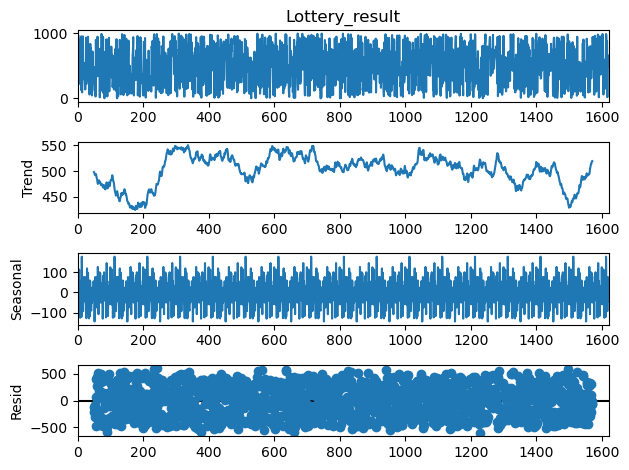

In [ ]:
#024 SLT分解：元DATA = Trend + 季節性 + 残差　グラフで確認

#移動平均法を利用したモデル(加法モデルを仮定)
#1_設定した季節性の周期の移動平均を計算しトレンド成分とする
#2_原系列からトレンド成分を除去し季節成分（平均値を0に調整）を求める
#3_原系列からトレンド成分と季節成分を除去し残差を求める

# 成分分解
#result=seasonal_decompose(Num_3_all.Lottery_result, model='additive', period=100) #初期period=12
result=seasonal_decompose(Num_3_all.Lottery_result, model='date', period=100) #初期period=12
# グラフ化
result.plot()
plt.show()



In [ ]:
#025
#移動平均法を利用した分解（乗法モデルを仮定）
# 成分分解
result=seasonal_decompose(Num_3_all.Lottery_result, model='multiplicative', period=100) #初期period=12
# グラフ化
result.plot()
plt.show()

#乗算的な季節性は、ゼロと負の値には適切ではありません


ValueError: Multiplicative seasonality is not appropriate for zero and negative values

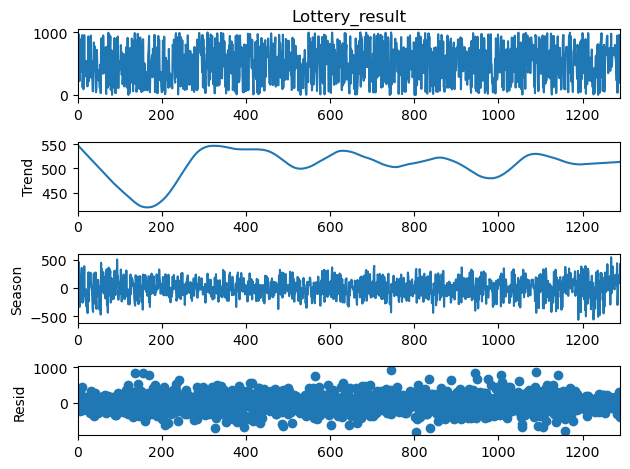

In [ ]:
#026
#STL分解（LOESS平滑化を利用した分解）
# 成分分解
stl=STL(Num_3_all.Lottery_result, period=100, robust=True).fit() #初期period=12
# STL分解結果のグラフ化
stl.plot()
plt.show()



/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


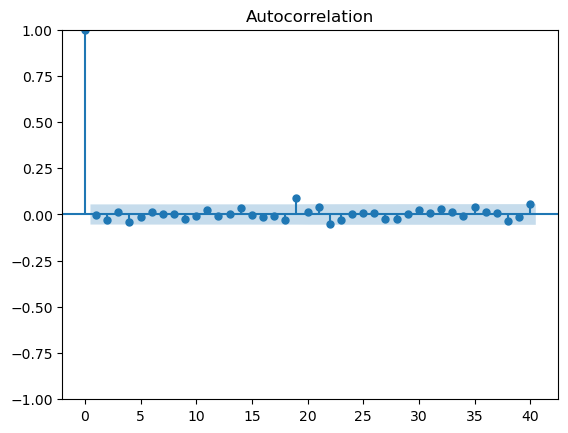

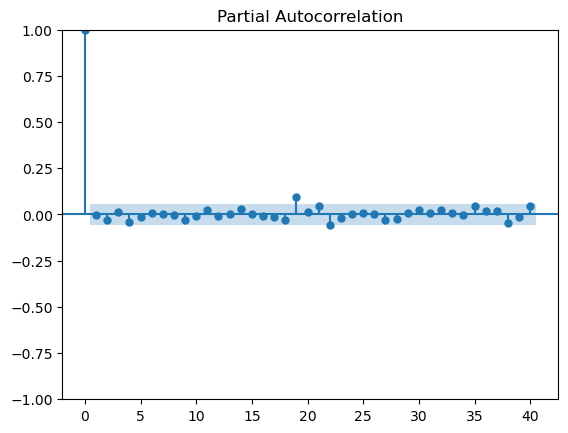

In [ ]:
#025
# 自己相関（原系列）
acf = plot_acf(Num_3_all.Lottery_result, lags=40)
pacf = plot_pacf(Num_3_all.Lottery_result, lags=40)


In [ ]:
#026
#ADF統計量の基準
#p値(p-value)<0.01 1%優位***一番厳しい
#p値(p-value)<0.05 5%優位***一般的
#p値(p-value)<0.10 10%優位***ゆるい

# ADF検定（原系列）
#dftest = adfuller(df.Passengers)
dftest = adfuller(Num_3_all.Lottery_result)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

#帰無仮説（時系列は非定常である）は棄却できませんでした。    


ADF Statistic: -36.029647
p-value: 0.000000
Critical values :
	 1% -3.435433297366533
	 5% -2.863784847800804
	 10% -2.5679651739400224


/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


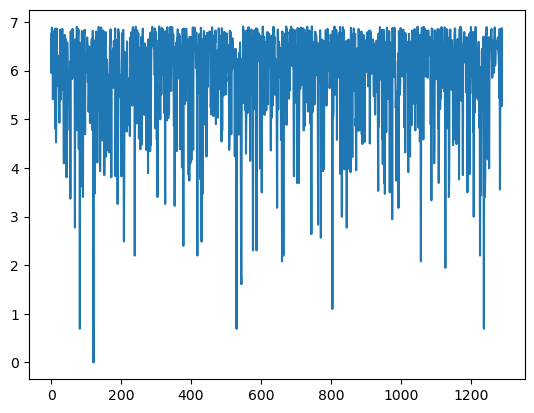

In [ ]:
#027
# 対数変換
df_log = np.log(Num_3_all.Lottery_result)
plt.plot(df_log)


In [ ]:
#028
# ADF検定（対数系列）
#df_log = np.log(Num_3_all.Lottery_result)
dftest_1 = adfuller(df_log)
dftest=round(dftest_1,2)
#dftest = adfuller(Num_3_all.Lottery_result)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

#inf nan はゼロや無限大があると適切でない    


LinAlgError: SVD did not converge

In [ ]:
#データの数値を確認して丸めて無限大を消した
df_log = np.log(Num_3_all.Lottery_result)
x_num=round(df_log,2)
x_num

0       6.75
1       5.95
2       6.88
3       6.84
4       6.45
        ... 
1285    6.75
1286    6.83
1287    6.86
1288    5.27
1289    6.86
Name: Lottery_result, Length: 1290, dtype: float64

In [ ]:
#有限数のときに True (inf, -inf, nan など) の場合は False
import math
df_log=math.inf
x_num= math.isfinite(df_log)
x_num

False

In [ ]:
#ゼロを消すと


In [ ]:
#028
# 階差
df_log_diff1 = df_log.diff(1).dropna()
plt.plot(df_log_diff1)

AttributeError: 'float' object has no attribute 'diff'

In [ ]:
#029
# ADF検定
df_log_diff1 = df_log.diff(1).dropna()
dftest = adfuller(df_log_diff1)
#dftest = adfuller(Num_3_all.Lottery_result)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

AttributeError: 'float' object has no attribute 'diff'

In [ ]:

import numpy as np

# nanの確認:0ならnanは存在しない
#print(np.isnan(x).sum())
print(exog.isnan(x).sum())

# infの確認:0ならinfは存在しない
#print(np.isinf(x).sum())
print(exog.isinf(x).sum())

NameError: name 'exog' is not defined

In [ ]:
#030 欠損値NaN＿なければFalse
print(Num_3_all.isnull())

         No   date  Lottery_result  hundreds_place  tens_place  ones_place  \
0     False  False           False           False       False       False   
1     False  False           False           False       False       False   
2     False  False           False           False       False       False   
3     False  False           False           False       False       False   
4     False  False           False           False       False       False   
...     ...    ...             ...             ...         ...         ...   
1285  False  False           False           False       False       False   
1286  False  False           False           False       False       False   
1287  False  False           False           False       False       False   
1288  False  False           False           False       False       False   
1289  False  False           False           False       False       False   

      kaibetu  day_of_week  day_name  
0       False        Fal

In [ ]:
#031 欠損値NaN_なければFalse
print(Num_3_all.isna())

         No   date  Lottery_result  hundreds_place  tens_place  ones_place  \
0     False  False           False           False       False       False   
1     False  False           False           False       False       False   
2     False  False           False           False       False       False   
3     False  False           False           False       False       False   
4     False  False           False           False       False       False   
...     ...    ...             ...             ...         ...         ...   
1285  False  False           False           False       False       False   
1286  False  False           False           False       False       False   
1287  False  False           False           False       False       False   
1288  False  False           False           False       False       False   
1289  False  False           False           False       False       False   

      kaibetu  day_of_week  day_name  
0       False        Fal

In [ ]:
##ここまで
